In [19]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'train.csv'  
data = pd.read_csv(file_path)

# 1. Inspect Dataset Structure
print("First few rows of the dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

# 2. Check for Missing Values
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values)

# Handle missing data (Example: Dropping rows with many missing values)
threshold = 0.5  # Drop rows if more than 50% of the values are missing
data = data.dropna(thresh=int(threshold * data.shape[1]))

# Optionally, fill missing values (Example: filling with the mean)
data = data.fillna(data.mean(numeric_only=True))

# 3. Identify and Remove Duplicates
print(f"\nNumber of duplicates: {data.duplicated().sum()}")
data = data.drop_duplicates()

# 4. Clean Column Names
data.columns = [col.strip().lower().replace(' ', '_') for col in data.columns]
print("\nCleaned Column Names:")
print(data.columns)

# 5. Filter Irrelevant Data (Example: Dropping unnecessary columns)
# Specify columns to drop if irrelevant
columns_to_drop = ['unnamed:_0']  # Replace with actual irrelevant columns
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns], errors='ignore')

# 6. Handle Outliers (Example: Capping numeric columns)
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Final dataset preview
print("\nCleaned Dataset Preview:")
print(data.head())

# Save the cleaned dataset
data.to_csv('cleaned_train.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_train.csv'")

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

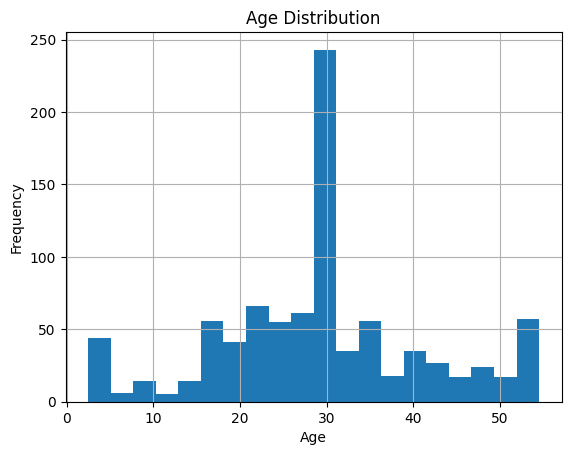

In [12]:
import matplotlib.pyplot as plt
data['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [14]:
#survival rate by Gender
print(data.groupby('sex')['survived'].mean())

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


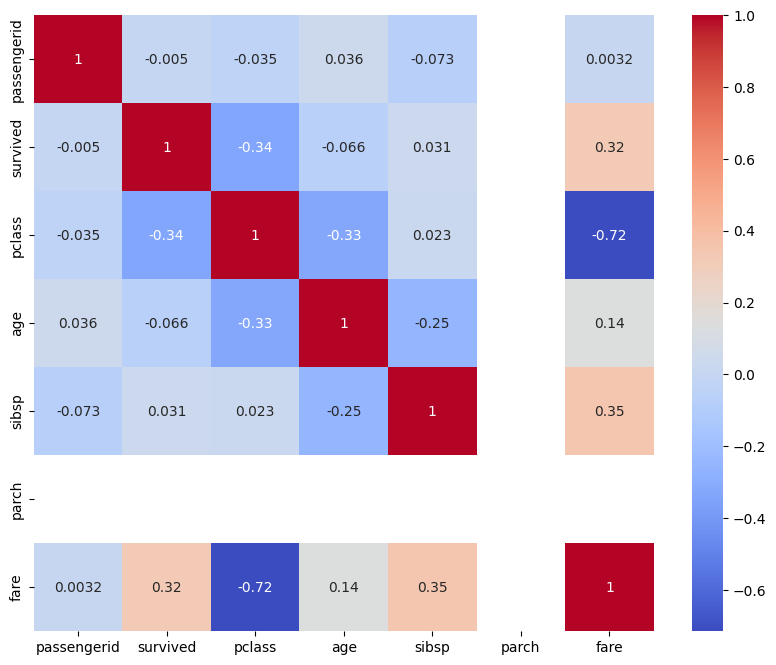

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df=data.select_dtypes(include='number')

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

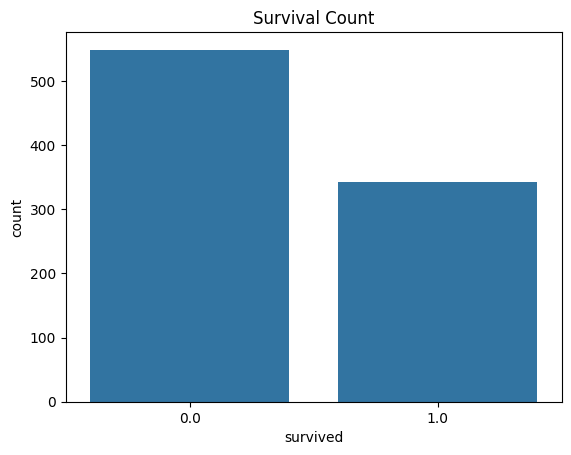

In [25]:
#creat a count plot for the'Survived'
sns.countplot(x='survived',data=data)

plt.title('Survival Count')
plt.show

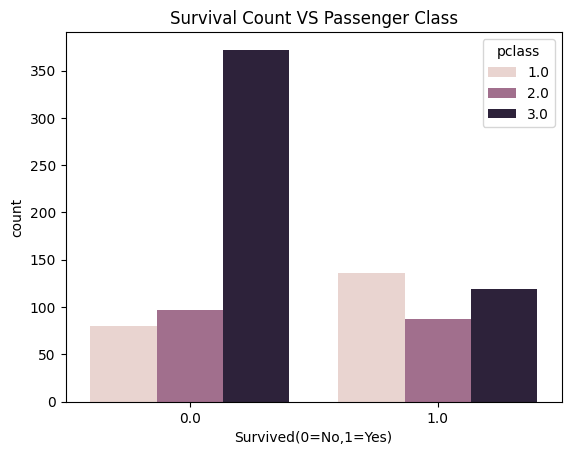

In [38]:
sns.countplot(x='survived',hue='pclass',data=data)

plt.title('Survival Count VS Passenger Class')

plt.xlabel('Survived(0=No,1=Yes)')

plt.show()

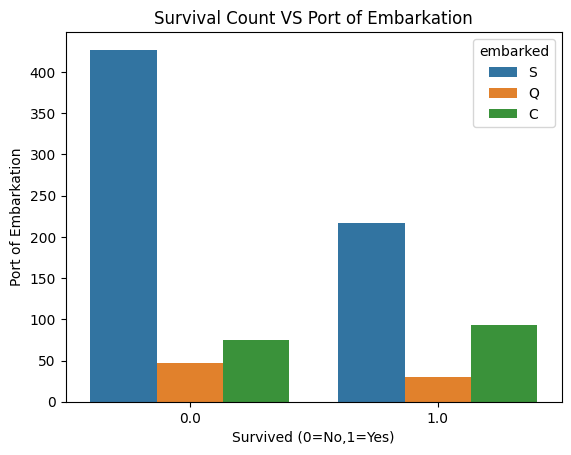

In [36]:
sns.countplot(x='survived',hue='embarked',data=data)

plt.title('Survival Count VS Port of Embarkation')

plt.xlabel('Survived (0=No,1=Yes)')
plt.ylabel('Port of Embarkation')
plt.show()

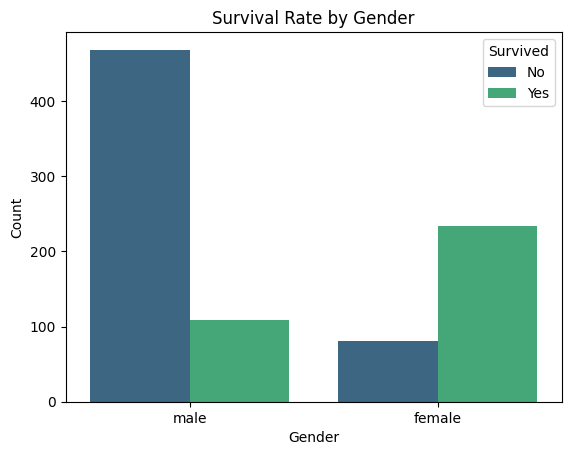

In [40]:
#Survival rate by Gender
sns.countplot(data=data, x='sex', hue='survived', palette='viridis')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


C:\Users\janha\AppData\Local\Temp\ipykernel_10608\3226105482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='pclass', y='fare', palette='Set3')


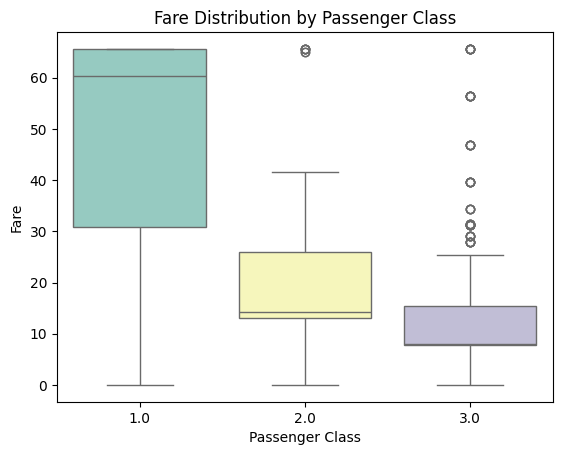

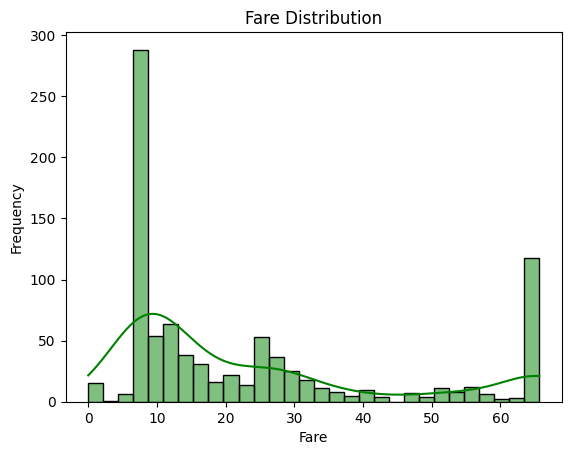

In [46]:
#Fare Distribution
sns.boxplot(data=data, x='pclass', y='fare', palette='Set3')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

sns.histplot(data['fare'], kde=True, bins=30, color='green', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


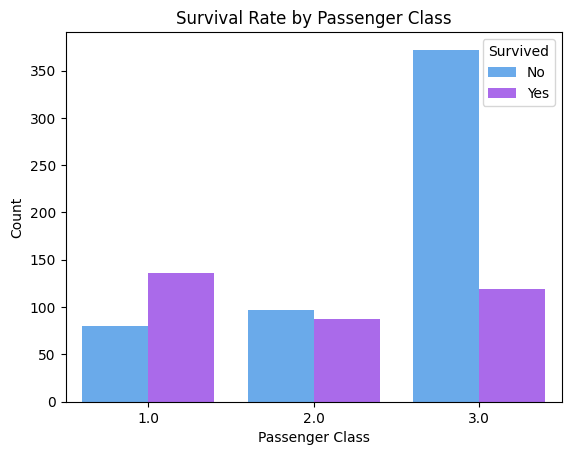

In [43]:
#Survival Rate by Passenger Class
sns.countplot(data=data, x='pclass', hue='survived', palette='cool')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


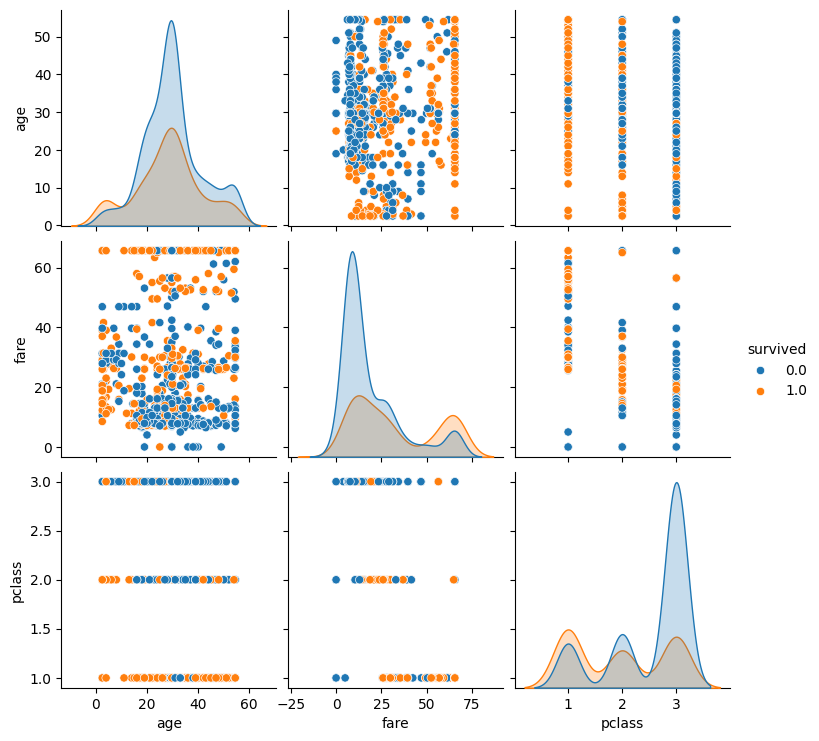

In [34]:
sns.pairplot(data,vars=['age','fare','pclass'],hue?='survived',diag_kind='kde')
plt.show()

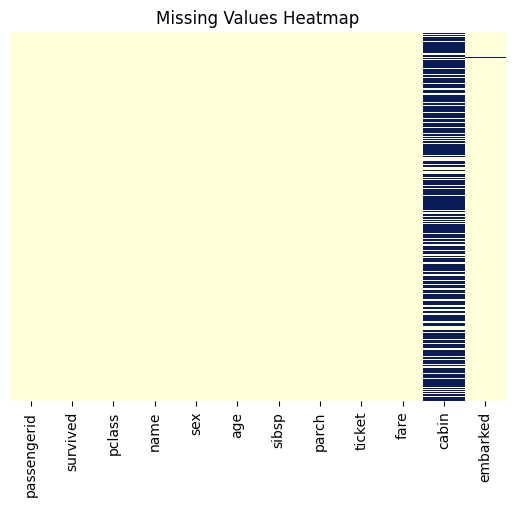

In [47]:
#Missing Values Heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='YlGnBu', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()